In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\dell\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
df = pd.read_csv('spam.csv',encoding='latin-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
X = df.iloc[:,:-1]

In [5]:
X

,v1,v2,Unnamed: 2,Unnamed: 3
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN


In [6]:
df.shape

(5572, 5)

###  Stages in ML Model
1. Data Cleaning
2. EDA
3. Text PreProcessing
4. Model Building
5. Model Evaluation
6. Improvements depending upon the Evaluation
7. Website Creation
8. Deploy

## 1. Data Cleaning 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


##### We can see last 3 colums are of not use so we can simply delete the unnecessary columns

In [8]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [9]:
df.rename(columns={'v1':'target','v2':'Text'},inplace=True)

In [10]:
df

,target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['target'] = le.fit_transform(df['target'])
df.head()

,target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df.isnull().sum() 
#We can see there are no missing values

target    0
Text      0
dtype: int64

In [13]:
#Checking Duplicate Values, 
df.duplicated().sum()

403

In [14]:
#Above cell shows that there are 403, duplicate values. So lets' delete duplicate entries.
df = df.drop_duplicates(keep='first')

In [15]:
#Checking Duplicate Values, 
df.duplicated().sum()

0

In [16]:
df.shape

(5169, 2)

### 2. EDA 

<AxesSubplot:xlabel='target', ylabel='count'>

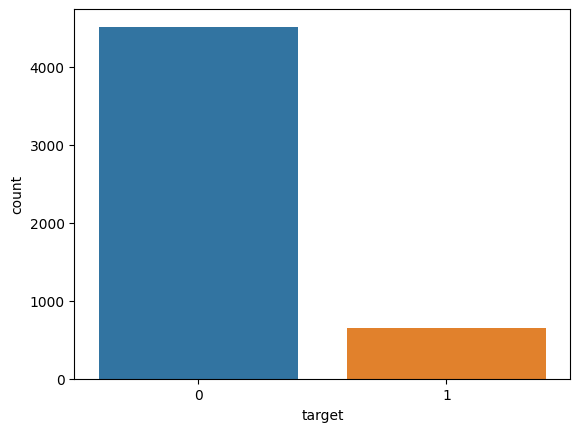

In [17]:
sns.countplot(x=df['target'])
#Below chart shows that apprx 4500 records are ham and approx 600 entries are spam. This summary shows that data is imbalanced

In [18]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
df.head()

,target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
#Creating New columns for Characters, Word & Sentence Count
df['num_characters'] = df['Text'].apply(len)

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [21]:
#Number of Words
df['num_words'] = df['Text'].apply(lambda x: nltk.word_tokenize(x))

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [22]:
#Number of Sentences
df['num_sentences'] = df['Text'].apply(lambda x: len(nltk.sent_tokenize(x)))

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [23]:
df.head()

,target,Text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point, ,, crazy.., Availab...",2
1,0,Ok lar... Joking wif u oni...,29,"[Ok, lar, ..., Joking, wif, u, oni, ...]",2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",2
3,0,U dun say so early hor... U c already then say...,49,"[U, dun, say, so, early, hor, ..., U, c, alrea...",1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, do, n't, think, he, goes, to, usf, ,,...",1


In [24]:
#Getting Description for Ham & Spam Messages
ham_df = df.loc[df['target']==0]
ham_df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_sentences
count,4516.000000,4516.000000
mean,70.459256,1.815545
std,56.358207,1.364098
min,2.000000,1.000000
25%,34.000000,1.000000
50%,52.000000,1.000000
75%,90.000000,2.000000
max,910.000000,38.000000


In [25]:
#Getting Description for Ham & Spam Messages
spam_df = df.loc[df['target']==1]
spam_df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_sentences
count,653.000000,653.000000
mean,137.891271,2.969372
std,30.137753,1.488910
min,13.000000,1.000000
25%,132.000000,2.000000
50%,149.000000,3.000000
75%,157.000000,4.000000
max,224.000000,9.000000


C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  after removing t

<AxesSubplot:xlabel='num_characters', ylabel='Density'>

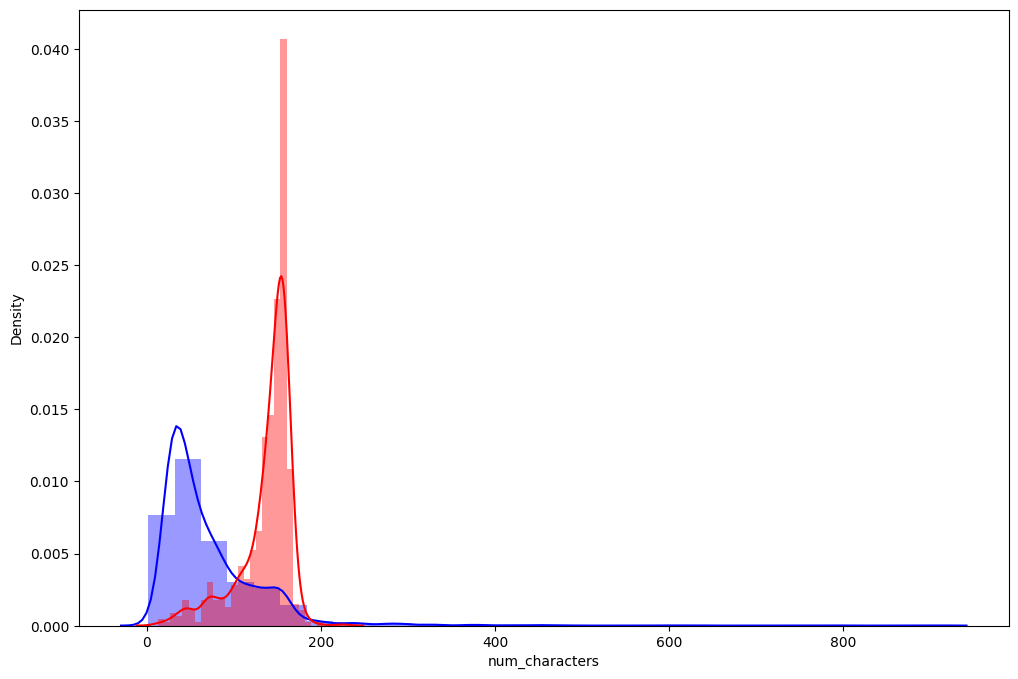

In [26]:
#Plotting Characters distribution using seaborn library
plt.figure(figsize=(12,8))
sns.distplot(ham_df["num_characters"],bins=30,color='blue')
sns.distplot(spam_df["num_characters"],bins=30,color='red')


In [27]:
#Above chart shows that spam messages has maximum number of characters. But there are outliers in ham dataset. As few of
#the ham messages has maximum number of charaacters.

<AxesSubplot:>

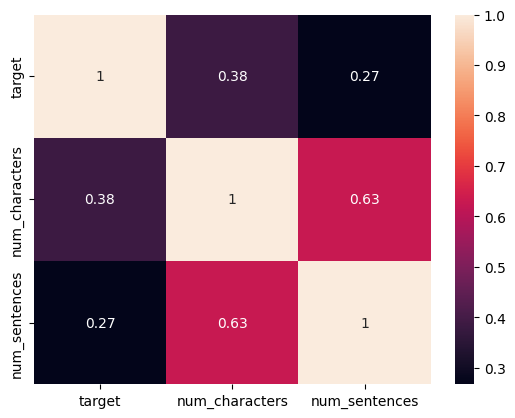

In [28]:
sns.heatmap(df.corr(),annot=True)

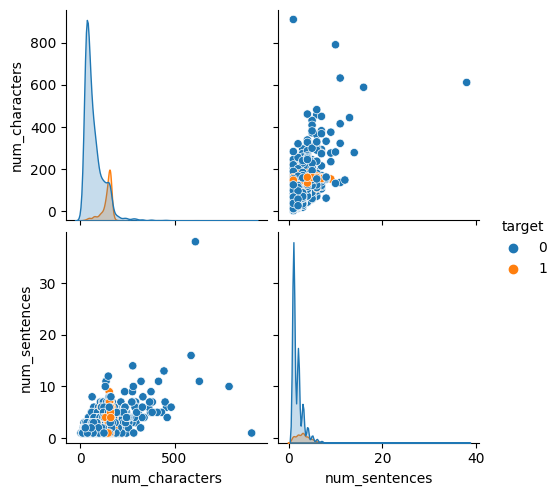

In [29]:
sns.pairplot(df,hue='target')

##### Above chart and correlation chart shows that multicolinearity is too high between number of characters & Number of words. Also number of words is 0.38 correlated with Target value i.e., Spam.

### 3. Data Preprocessing 
1. Lower Case
2. Tokenization
3. Removing Special Characters
4. Removing Stop Words and Punctuations
5. Stemming

In [30]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()


def Transform_Text(text):
    #Converting text to lower case
    lowercase_text = text.lower()
    
    tokenize_words = nltk.word_tokenize(lowercase_text)
    temp = []
    for i in tokenize_words:
        if i.isalnum():
            temp.append(i)
    temp2 = [] 
    for i in temp:
        if i not in stopwords.words('english') and i not in string.punctuation:
            temp2.append(i)
    temp3 = []
    for i in temp2:
        temp3.append(ps.stem(i))
    return ' '.join(temp3)

In [31]:
 Transform_Text('Hi I am Karan Kaushik. And I work in Genpact. I am very passionate about coding.')

'hi karan kaushik work genpact passion code'

In [32]:
from nltk.corpus import stopwords
import string 
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

def transform_text(text):
    #Converting Lower Case
    text = text.lower()
    #Tokenize words
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    
    #Removing stopwords & Punctuations
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [33]:
Transform_Text('Hi I am Kara. How are you?')

'hi kara'

In [34]:
df['transformed_text'] = df['Text'].apply(Transform_Text)

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [35]:
df.head()

,target,Text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point, ,, crazy.., Availab...",2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,"[Ok, lar, ..., Joking, wif, u, oni, ...]",2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,"[U, dun, say, so, early, hor, ..., U, c, alrea...",1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, do, n't, think, he, goes, to, usf, ,,...",1,nah think goe usf live around though


In [36]:
from wordcloud import WordCloud
wc = WordCloud(width=50,height=50,min_font_size=10,background_color='white')
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep= " "))
plt.figure(figsize=(100,10))
plt.imshow(spam_wc)

AttributeError: 'TransposedFont' object has no attribute 'getbbox'

In [ ]:
spam_corpus = []
for msg in df.loc[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [ ]:
len(spam_corpus)

In [ ]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')

### 4. Model Building

In [37]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=10000)

In [38]:
X = tfidf.fit_transform(df['transformed_text']).toarray()
y = df['target'].values

In [39]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [40]:
X.shape

(5169, 6629)

In [41]:
y 

array([0, 0, 1, ..., 0, 0, 0])

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [44]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB ()

In [45]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8539651837524178
[[763 126]
 [ 25 120]]
0.4878048780487805


In [46]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9622823984526112
[[888   1]
 [ 38 107]]
0.9907407407407407


In [47]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9661508704061895
[[885   4]
 [ 31 114]]
0.9661016949152542


In [48]:
#Based on above model analysis, we will go ahead with Multinomial Naive Bayes with Tfidf Vectorizer

##### Lets' Create different different classification Model and track their accuracies & precision score.

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [52]:
svc = SVC(kernel='sigmoid',gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB ()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear',penalty='l1')
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [53]:
clfs = {
    'SVC':svc,
    'KN':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'Bgc':bc,
    'ETC':etc,
    'GBDT':gbdt,
    'XGB':xgb
}

In [54]:
from sklearn.metrics import accuracy_score,precision_score
def train_classifier(clfs,X_train,X_test,y_train,y_test):
    accuracy_scores = []
    precision_scores = []
    for model_name,model in clfs.items():
        temp_model = model.fit(X_train,y_train)
        pred_results = temp_model.predict(X_test)
        accuracy_scores.append(accuracy_score(y_test,pred_results))
        precision_scores.append(precision_score(y_test,pred_results))
    return accuracy_scores,precision_scores

In [55]:
accuracy,precision = train_classifier(clfs,X_train,X_test,y_train,y_test)

C:\Users\dell\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:26:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [56]:
len(clfs.keys())

11

In [57]:
len(accuracy)

11

In [58]:
len(precision)

11

In [59]:
performance_df = pd.DataFrame({'Algorith':clfs.keys(),'Accuracy':accuracy,'Precision':precision}).sort_values('Precision',ascending=False)
performance_df

,Algorith,Accuracy,Precision
1,KN,0.896518,1.000000
8,ETC,0.975822,1.000000
5,RF,0.966151,0.991071
2,NB,0.962282,0.990741
9,GBDT,0.952611,0.961538
10,XGB,0.971954,0.953125
0,SVC,0.970986,0.932331
7,Bgc,0.962282,0.884058
4,LR,0.943907,0.865546
6,AdaBoost,0.950677,0.850746


Above summary shows that NB Performs best as its Precision Score is also high.

In [62]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [63]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [64]:
import pickle
pickle.dump(tfidf,open('file.pkl','wb'))

In [66]:
import pickle
pickle.dump(mnb,open('model.pkl','wb'))